<a href="https://colab.research.google.com/github/kubraguran/data_analysis/blob/main/titanic_odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#import files
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [15]:

import pandas as pd
df = pd.read_csv("train.csv")


# New Section

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Calculate the average age only for the passengers who died

In [40]:
df.groupby("Survived")["Age"].agg("mean").loc[0]

np.float64(30.62617924528302)

Find the average and median ticket fare for passengers who died in the accident.

In [56]:
df.groupby("Survived")["Fare"].agg(["mean", "median"])

,mean,median
Survived,,
0,22.117887,10.5
1,48.395408,26.0


Find the average age of male passengers who died in the accident

In [52]:
mean_age_dead_male = df.query('Survived == 0 and Sex == "male"')['Age'].mean()
mean_age_dead_male

np.float64(31.618055555555557)

Find the average age of female passengers who died in the accident

In [59]:
mean_age_dead_female = df.query('Survived == 0 and Sex == "female"')['Age'].mean()
mean_age_dead_female

np.float64(25.046875)

Find the average age of passengers who survived the accident

In [60]:
mean_age_survived = df.query('Survived == 1')['Age'].mean()
mean_age_survived


np.float64(28.343689655172415)

Find the average ticket fare of passengers who survived the accident

In [44]:

fare_survived_mean = df[df["Survived"] == 1]["Fare"].mean()
df.groupby("Survived")["Fare"].agg("mean")

,Fare
Survived,
0,22.117887
1,48.395408


Find the total number of passengers who survived the accident

In [61]:

total_survived = len(df.loc[df["Survived"] == 1])
total_survived


342

Find the median ticket fare of passengers younger than 10 years old

In [46]:

median_fare_under10 = df[df["Age"] < 10]["Fare"].median()
median_fare_under10


27.0

Compare the average and median ticket fares of 1st, 2nd, and 3rd class passengers

In [47]:

class_fares = df.groupby("Pclass")["Fare"].agg(["mean", "median"])
class_fares



,mean,median
Pclass,,
1,84.154687,60.2875
2,20.662183,14.2500
3,13.675550,8.0500


Compare the death rate of female passengers with that of male passengers

In [66]:

# women
female_death_ratio = df[df["Sex"] == "female"]["Survived"].value_counts(normalize=True).get(0, 0)

# men
male_death_ratio = df[df["Sex"] == "male"]["Survived"].value_counts(normalize=True).get(0, 0)

female_death_ratio,male_death_ratio

(np.float64(0.25796178343949044), np.float64(0.8110918544194108))

Count of survival by sex

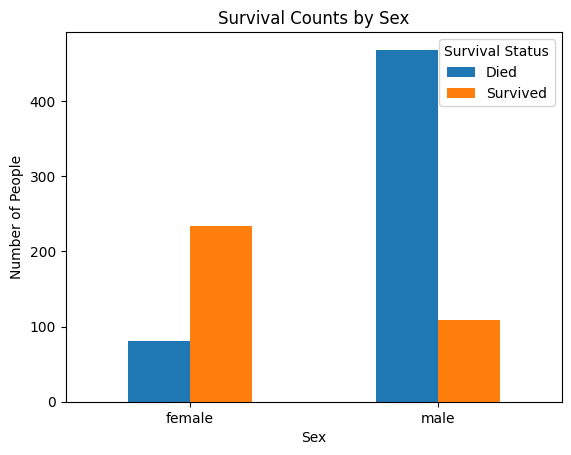

In [67]:
import matplotlib.pyplot as plt


pivot = df.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=False)
plt.title("Survival Counts by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.legend(["Died", "Survived"], title="Survival Status")
plt.show()


Age Distribution: Survivors vs Non-Survivors

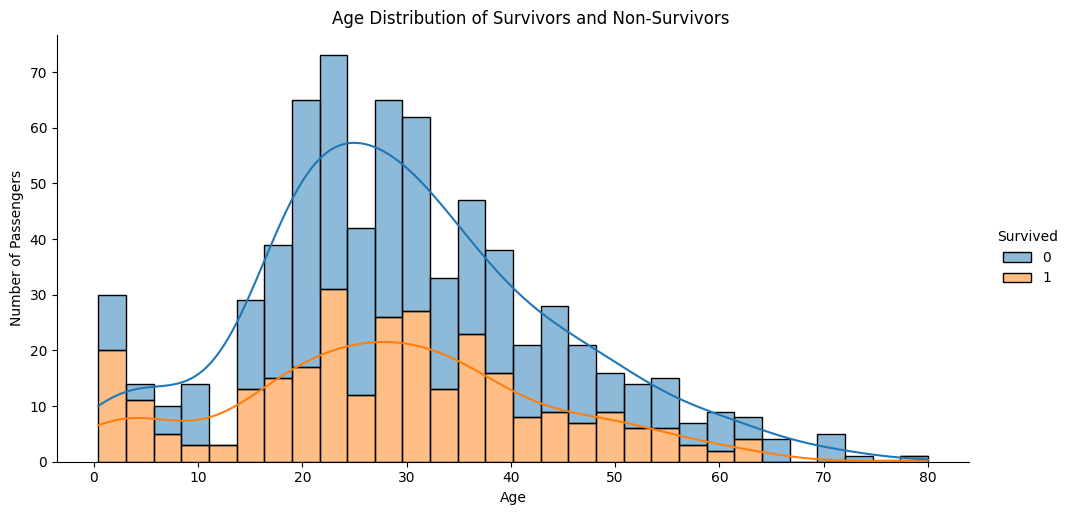

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="Age", hue="Survived", bins=30, kde=True, multiple="stack", height=5, aspect=2)
plt.suptitle("Age Distribution of Survivors and Non-Survivors", y=1.02)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


Survival by Passenger Class

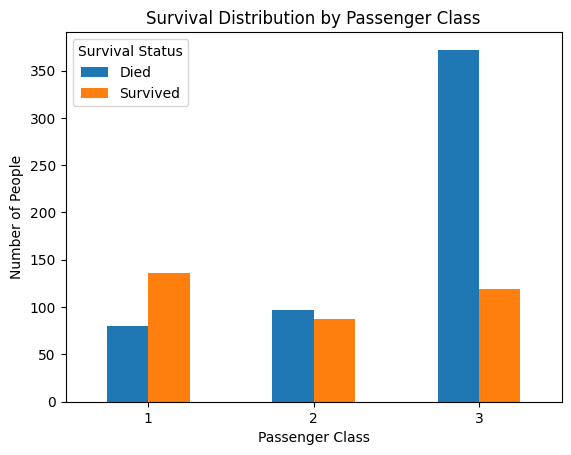

In [69]:

import matplotlib.pyplot as plt

survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

survival_counts.plot(kind='bar')
plt.title("Survival Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.legend(["Died", "Survived"], title="Survival Status")
plt.show()
